In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer

from imblearn.pipeline import Pipeline as ImblearnPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.utils import resample

In [2]:
df = pd.read_csv('hr_analytics.csv')

In [3]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [6]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

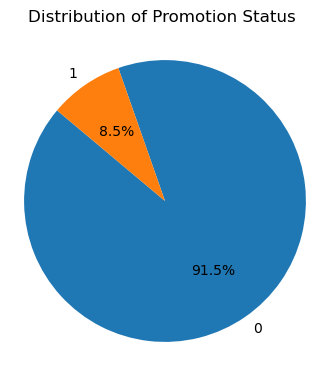

In [7]:
plt.figure(figsize=(4,4))
output_counts = df['is_promoted'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Promotion Status \n')
plt.ylabel('')

plt.show()

Box plot for numerical features:


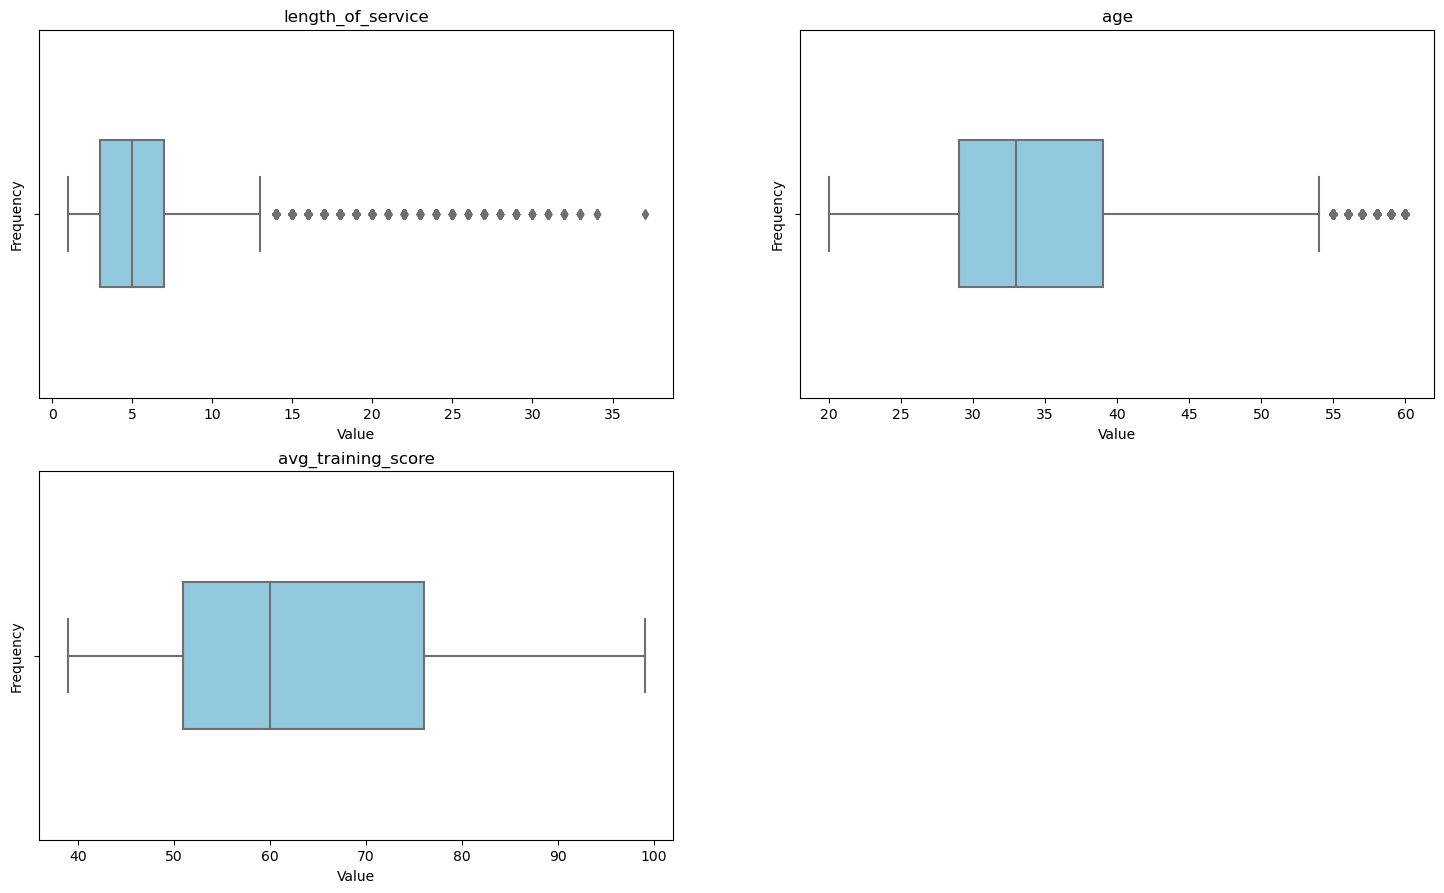

In [8]:
print("Box plot for numerical features:")
plt.figure(figsize=(18,22))
numeric_features = ['length_of_service','age','avg_training_score']
for i, column in enumerate(numeric_features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=df[column], color='skyblue', width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

Count plot for categorical features:


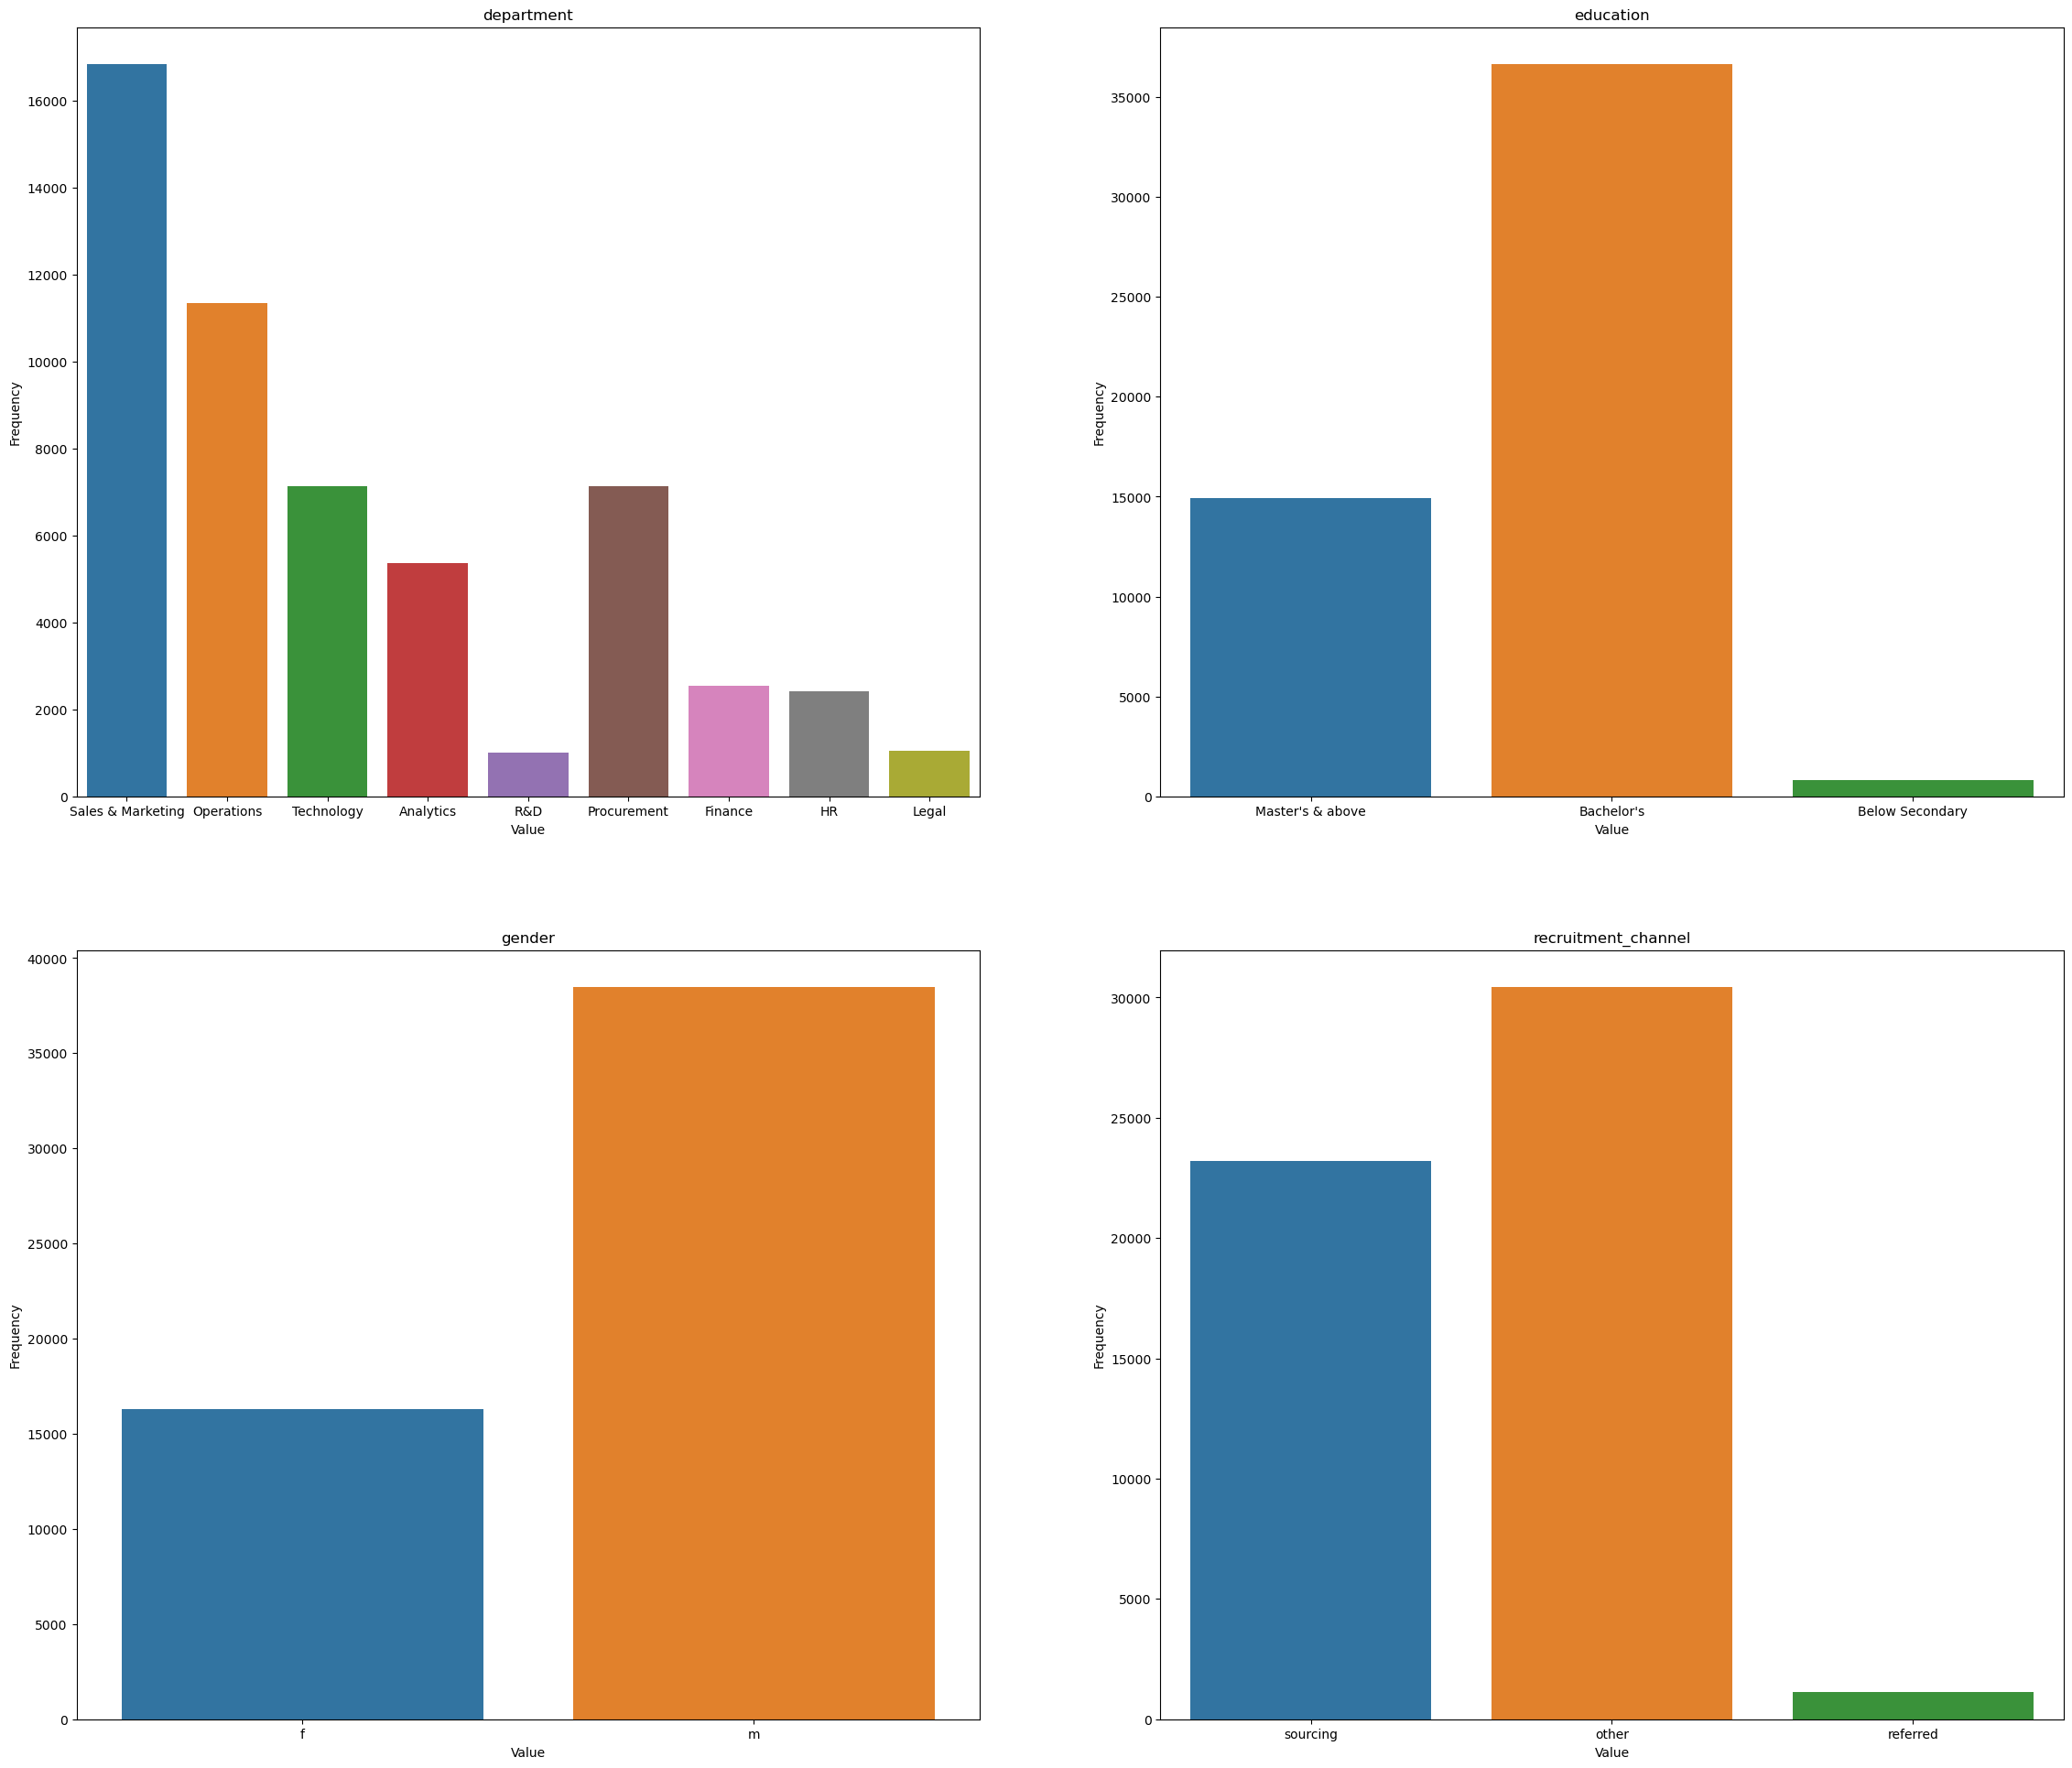

In [9]:
print("Count plot for categorical features:")
plt.figure(figsize=(28,24))

for i, column in enumerate(['department','education','gender','recruitment_channel']):
    plt.subplot(2,2,i + 1)
    sns.countplot(x= df[column], data=df)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

Observing independent variables based on the Promoted Column:


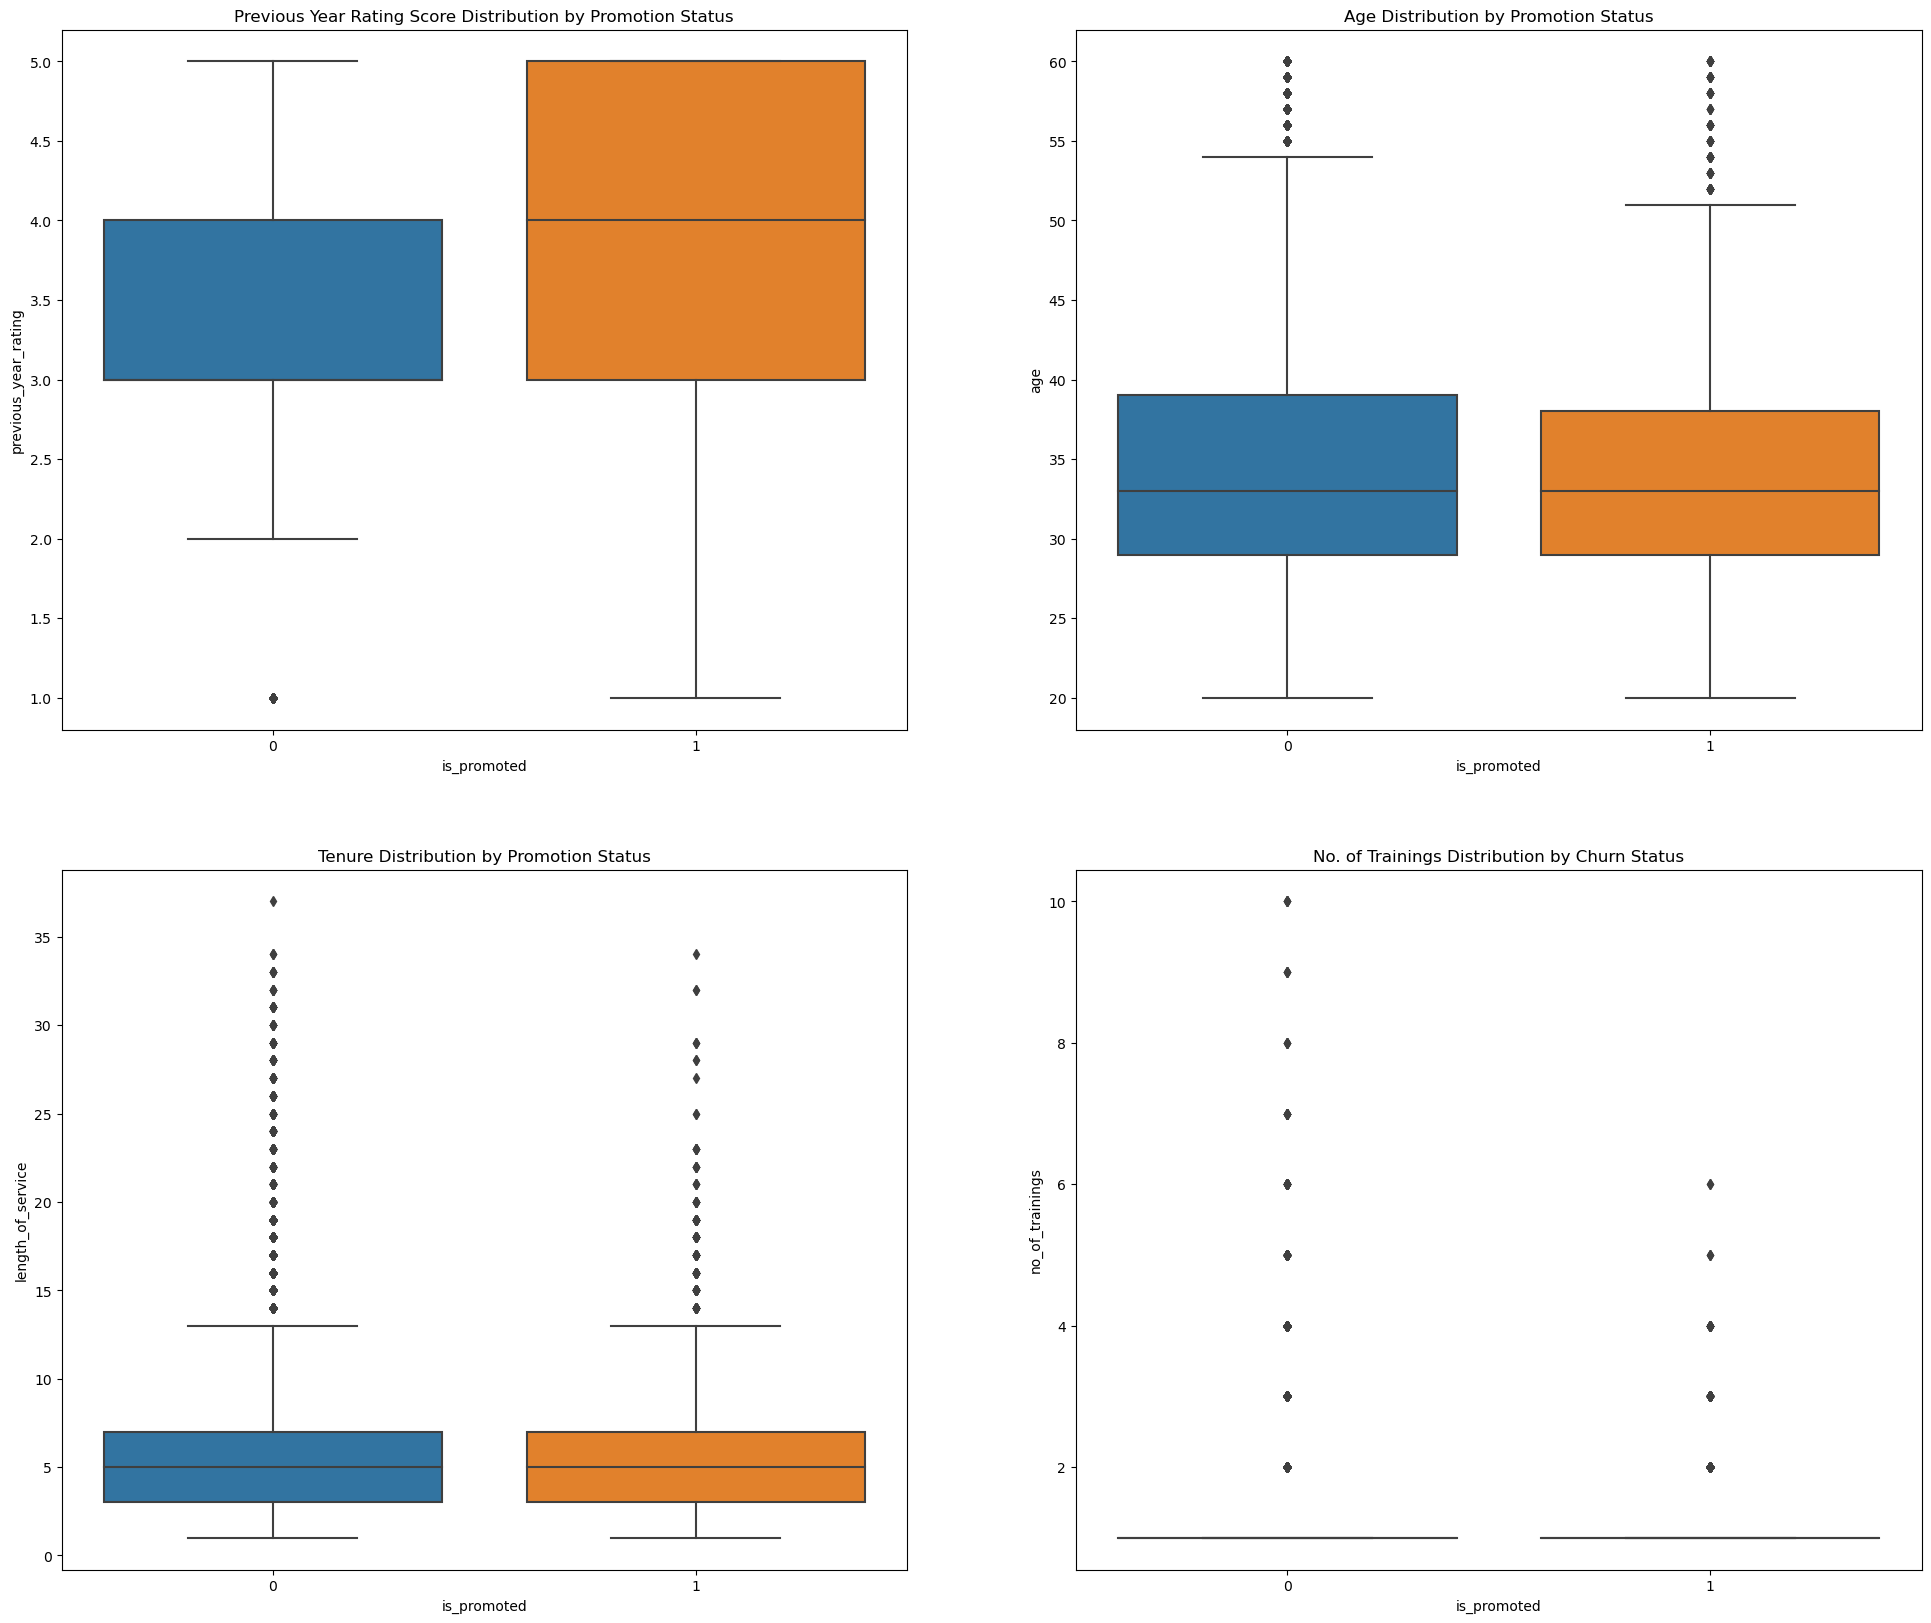

In [10]:
print("Observing independent variables based on the Promoted Column:")

fig, axes = plt.subplots(2,2, figsize=(24,20))

sns.boxplot(data=df, y='previous_year_rating', x ='is_promoted',  ax=axes[0,0])
axes[0,0].set_title('Previous Year Rating Score Distribution by Promotion Status')

sns.boxplot(data=df, y='age', x ='is_promoted', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Promotion Status')

sns.boxplot(data=df, y='length_of_service', x ='is_promoted', ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Promotion Status')

sns.boxplot(data=df, y='no_of_trainings', x ='is_promoted', ax=axes[1,1])
axes[1,1].set_title('No. of Trainings Distribution by Churn Status')

plt.show()

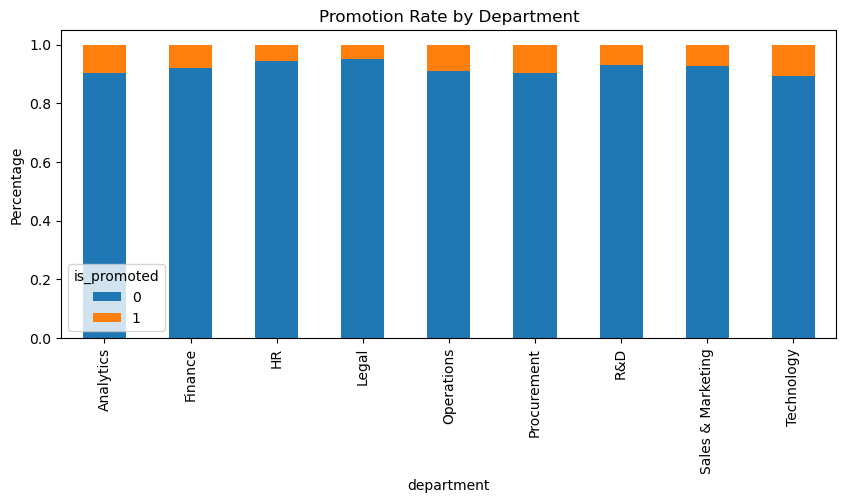

In [11]:
ct = pd.crosstab(df['department'], df['is_promoted'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.title('Promotion Rate by Department')
plt.ylabel('Percentage')
plt.show()

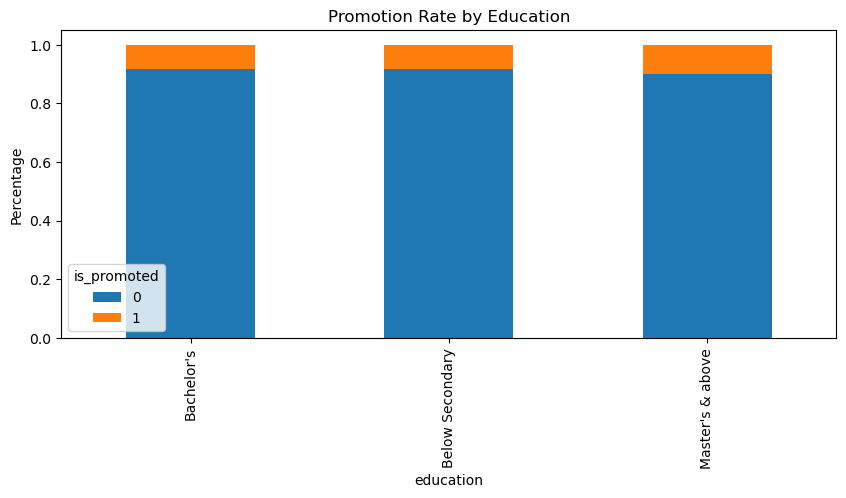

In [12]:
ct = pd.crosstab(df['education'], df['is_promoted'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.title('Promotion Rate by Education')
plt.ylabel('Percentage')
plt.show()

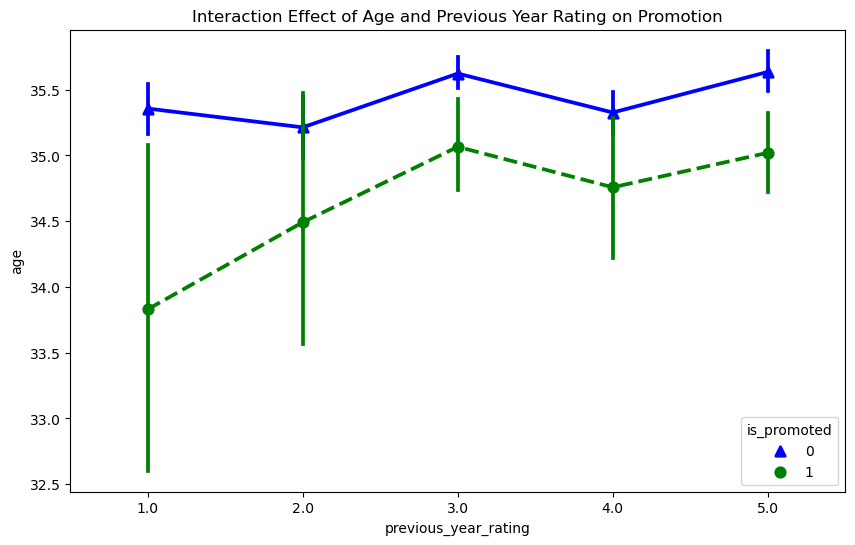

In [13]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='previous_year_rating', y='age', hue='is_promoted', data=df, palette={0: 'blue', 1: 'green'}, markers=["^", "o"], linestyles=["-", "--"])
plt.title('Interaction Effect of Age and Previous Year Rating on Promotion')
plt.show()

/var/folders/zr/3d272zpd4vv3hvlhrp34nnyr0000gn/T/ipykernel_92618/3540796583.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_promoted']==0]['avg_training_score'], label='Not Promoted', shade=True)
/var/folders/zr/3d272zpd4vv3hvlhrp34nnyr0000gn/T/ipykernel_92618/3540796583.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_promoted']==1]['avg_training_score'], label='Promoted', shade=True)


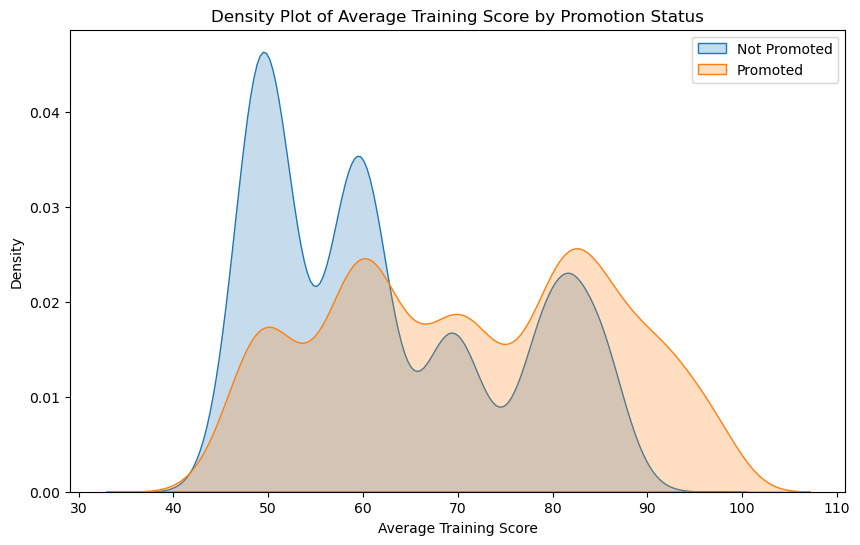

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['is_promoted']==0]['avg_training_score'], label='Not Promoted', shade=True)
sns.kdeplot(df[df['is_promoted']==1]['avg_training_score'], label='Promoted', shade=True)
plt.title('Density Plot of Average Training Score by Promotion Status')
plt.xlabel('Average Training Score')
plt.ylabel('Density')
plt.legend()
plt.show()

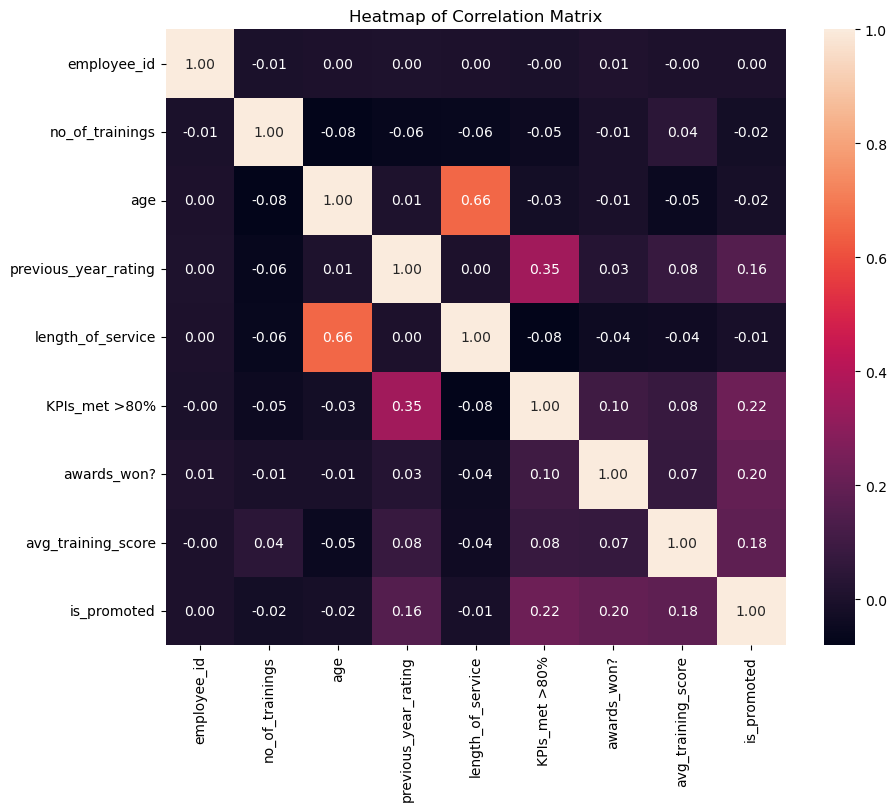

In [15]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [16]:
target_correlations = corr['is_promoted']
print(target_correlations)

employee_id             0.001206
no_of_trainings        -0.024896
age                    -0.017166
previous_year_rating    0.159320
length_of_service      -0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
is_promoted             1.000000
Name: is_promoted, dtype: float64


In [17]:
def impute_rating(row):
    if pd.isna(row['previous_year_rating']):
        if row['length_of_service'] == 0:
            return 0
        else:
            median_rating = df.loc[df['length_of_service'] == row['length_of_service'], 'previous_year_rating'].median()
            return median_rating
    else:
        return row['previous_year_rating']

df['previous_year_rating'] = df.apply(impute_rating, axis=1)

In [18]:
imputer_mode = SimpleImputer(strategy='most_frequent')
df['education'] = imputer_mode.fit_transform(df[['education']])

In [19]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [20]:
cat_col = ['department','region','education','gender','recruitment_channel']

print("Observing the categorical column disribution before encoding: \n")
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution before encoding: 

department 

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64 

region 

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18  

In [21]:
encoder = LabelEncoder()

for columns in cat_col:
    df[columns] = encoder.fit_transform(df[columns])

print("Observing the categorical column disribution after encoding: \n")    
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution after encoding: 

department 

7    16840
4    11348
8     7138
5     7138
0     5352
1     2536
2     2418
3     1039
6      999
Name: department, dtype: int64 

region 

11    12343
14     6428
31     4843
6      2808
4      2648
18     2260
24     1935
28     1703
19     1659
7      1465
20     1318
2      1315
15     1175
21      994
25      945
10      874
12      850
5       827
17      819
8       796
29      766
30      690
23      657
32      655
1       648
0       610
16      508
3       500
33      420
13      411
22      346
27      292
26      269
9        31
Name: region, dtype: int64 

education 

0    39078
2    14925
1      805
Name: education, dtype: int64 

gender 

1    38496
0    16312
Name: gender, dtype: int64 

recruitment_channel 

0    30446
2    23220
1     1142
Name: recruitment_channel, dtype: int64 



In [22]:
col_drop = ['employee_id']
df = df.drop(col_drop, axis=1)

In [23]:
scaler = StandardScaler()
numerical_features = ['age', 'length_of_service', 'avg_training_score']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df['age_length_service_interaction'] = df['age'] * df['length_of_service']

In [24]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_length_service_interaction
0,7,31,2,0,2,1,0.025598,5.0,0.500460,1,0,-1.075931,0,0.012811
1,4,14,0,1,0,1,-0.627135,5.0,-0.437395,0,0,-0.253282,0,0.274305
2,7,10,0,1,2,1,-0.104948,3.0,0.265996,0,0,-1.001145,0,-0.027916
3,7,15,0,1,0,2,0.547785,1.0,0.969387,0,0,-1.001145,0,0.531015
4,8,18,0,1,0,1,1.331064,3.0,-0.906322,0,0,0.718939,0,-1.206372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,2,1,1.722704,3.0,2.610632,0,0,1.092871,0,4.497346
54804,4,19,2,0,0,1,0.286691,2.0,0.031532,0,0,-0.552428,0,0.009040
54805,0,0,0,1,0,1,-1.018775,5.0,-0.671858,1,0,1.167657,0,0.684472
54806,7,33,0,1,2,1,-0.757681,1.0,-0.906322,0,0,-1.375077,0,0.686703


In [25]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [26]:
X_reg = df.drop(['is_promoted'], axis=1).to_numpy()
X_reg

array([[ 7.00000000e+00,  3.10000000e+01,  2.00000000e+00, ...,
         0.00000000e+00, -1.07593145e+00,  1.28108480e-02],
       [ 4.00000000e+00,  1.40000000e+01,  0.00000000e+00, ...,
         0.00000000e+00, -2.53282424e-01,  2.74305439e-01],
       [ 7.00000000e+00,  1.00000000e+01,  0.00000000e+00, ...,
         0.00000000e+00, -1.00114517e+00, -2.79158663e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.16765680e+00,  6.84472140e-01],
       [ 7.00000000e+00,  3.30000000e+01,  0.00000000e+00, ...,
         0.00000000e+00, -1.37507655e+00,  6.86703212e-01],
       [ 2.00000000e+00,  1.40000000e+01,  0.00000000e+00, ...,
         0.00000000e+00, -1.07593145e+00,  2.06741068e-01]])

In [27]:
y_reg = df['is_promoted'].to_numpy()
y_reg

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
def blb_classification_metrics(X, y, model, resample_size, num_subsamples, num_resamples, ci_level=0.95, k_neighbors=1):
    n = len(X)
    metrics = {
        'CI Width': [], 
        'Coverage': [], 
        'Accuracy': [],
        'Recall': [],
        'F1 Score': [],
        'ROC AUC': []
    }
    
    for i in range(num_subsamples):
        while True:
            indices = np.random.choice(n, resample_size, replace=False)
            X_subsample, y_subsample = X[indices], y[indices]
            if len(np.unique(y_subsample)) > 1:
                break

        minority_class_count = np.min(np.bincount(y_subsample))
        if minority_class_count > 1:
            smote_k_neighbors = min(k_neighbors, minority_class_count - 1)
        else:
            continue

        smote = SMOTE(random_state=42, k_neighbors=smote_k_neighbors)
        model_subsample = ImblearnPipeline([
            ('smote', smote),
            ('classifier', model)
        ])
        model_subsample.fit(X_subsample, y_subsample)
        
        original_probs = model_subsample.predict_proba(X_subsample)[:, 1]
        predictions = model_subsample.predict(X_subsample)
        
        bootstrap_probs = np.zeros((num_resamples, resample_size))
        for j in range(num_resamples):
            resample_indices = np.random.choice(resample_size, resample_size, replace=True)
            X_resample, y_resample = X_subsample[resample_indices], y_subsample[resample_indices]
            bootstrap_probs[j] = model_subsample.predict_proba(X_resample)[:, 1]
        
        metrics['Accuracy'].append(accuracy_score(y_subsample, predictions))
        metrics['Recall'].append(recall_score(y_subsample, predictions))
        metrics['F1 Score'].append(f1_score(y_subsample, predictions))
        metrics['ROC AUC'].append(roc_auc_score(y_subsample, original_probs))

        lower_bound = np.percentile(bootstrap_probs, (1 - ci_level) / 2 * 100, axis=0)
        upper_bound = np.percentile(bootstrap_probs, (1 + ci_level) / 2 * 100, axis=0)
        ci_width = np.mean(upper_bound - lower_bound)
        coverage = np.mean((original_probs >= lower_bound) & (original_probs <= upper_bound))

        metrics['CI Width'].append(ci_width)
        metrics['Coverage'].append(coverage)
    
    avg_metrics = {key: np.mean(val) for key, val in metrics.items()}
    return avg_metrics

def standard_bootstrap_clf_metrics(X, y, model, num_resamples, ci_level=0.95, k_neighbors=1):
    n = len(X)
    metrics = {
        'CI Width': [],
        'Coverage': [],
        'Accuracy': [],
        'Recall': [],
        'F1 Score': [],
        'ROC AUC': []
    }
    
    bootstrap_probs = np.zeros((num_resamples, n))

    for i in range(num_resamples):
        while True:
            resample_indices = np.random.choice(n, n, replace=True)
            X_resample, y_resample = X[resample_indices], y[resample_indices]
            
            if len(np.unique(y_resample)) > 1:
                break
        
        min_class_count = min(np.bincount(y_resample))
        smote_k_neighbors = max(min(k_neighbors, min_class_count - 1), 1)

        pipeline = ImblearnPipeline([
            ('smote', SMOTE(random_state=42, k_neighbors=smote_k_neighbors)),
            ('classifier', model)
        ])
        model_resample = pipeline.fit(X_resample, y_resample)
        predictions = model_resample.predict(X)
        prob_predictions = model_resample.predict_proba(X)[:, 1]

        bootstrap_probs[i] = prob_predictions
        
        metrics['Accuracy'].append(accuracy_score(y, predictions))
        metrics['Recall'].append(recall_score(y, predictions))
        metrics['F1 Score'].append(f1_score(y, predictions))
        metrics['ROC AUC'].append(roc_auc_score(y, prob_predictions))

    lower_bound = np.percentile(bootstrap_probs, (1 - ci_level) / 2 * 100, axis=0)
    upper_bound = np.percentile(bootstrap_probs, (1 + ci_level) / 2 * 100, axis=0)
    ci_width = np.mean(upper_bound - lower_bound)
    coverage = np.mean((y == 1) & (bootstrap_probs.mean(axis=0) >= 0.5))

    metrics['CI Width'] = ci_width
    metrics['Coverage'] = coverage
    
    for key in ['Accuracy', 'Recall', 'F1 Score', 'ROC AUC']:
        metrics[key] = np.mean(metrics[key])

    return metrics


In [29]:
clf_comparison_results = {}

In [30]:
blb_metrics_lr = blb_classification_metrics(X_reg,y_reg, model=LogisticRegression(solver='liblinear'),resample_size=100,num_subsamples=30,num_resamples=10000,ci_level=0.95,k_neighbors=2)
standard_metrics_lr = standard_bootstrap_clf_metrics(X_reg, y_reg, LogisticRegression(solver='liblinear'), num_resamples=10000)
clf_comparison_results['Logistic Regression'] = {'BLB': blb_metrics_lr, 'Standard Bootstrap': standard_metrics_lr}

In [31]:
blb_metrics_rf = blb_classification_metrics(X_reg, y_reg, RandomForestClassifier(n_estimators=100, random_state=42),resample_size=100,num_subsamples=30,num_resamples=10000,ci_level=0.95,k_neighbors=2)
standard_metrics_rf = standard_bootstrap_clf_metrics(X_reg, y_reg, RandomForestClassifier(n_estimators=100, random_state=42),num_resamples=10000)
clf_comparison_results['Random Forest Classification'] = {'BLB': blb_metrics_rf, 'Standard Bootstrap': standard_metrics_rf}

In [32]:
blb_metrics_gbc = blb_classification_metrics(X_reg, y_reg, GradientBoostingClassifier(n_estimators=100, random_state=42),resample_size=100,num_subsamples=30,num_resamples=10000,ci_level=0.95,k_neighbors=2)
standard_metrics_gbc = standard_bootstrap_clf_metrics(X_reg, y_reg, GradientBoostingClassifier(n_estimators=100, random_state=42),num_resamples=10000)
clf_comparison_results['Gradient Boosting Classification'] = {'BLB': blb_metrics_gbc, 'Standard Bootstrap': standard_metrics_gbc}

In [33]:
clf_comparison_results

{'Logistic Regression': {'BLB': {'CI Width': 0.8978528527515396,
   'Coverage': 0.9506666666666667,
   'Accuracy': 0.8139999999999998,
   'Recall': 0.865482202982203,
   'F1 Score': 0.4494348604405172,
   'ROC AUC': 0.9116630151964408},
  'Standard Bootstrap': {'CI Width': 0.04455018721648529,
   'Coverage': 0.061195445920303605,
   'Accuracy': 0.7204603342577726,
   'Recall': 0.7194037417880607,
   'F1 Score': 0.30477619082739804,
   'ROC AUC': 0.8073169074605956}},
 'Random Forest Classification': {'BLB': {'CI Width': 0.8452359166666665,
   'Coverage': 0.9739999999999999,
   'Accuracy': 1.0,
   'Recall': 1.0,
   'F1 Score': 1.0,
   'ROC AUC': 1.0},
  'Standard Bootstrap': {'CI Width': 0.1824705497637204,
   'Coverage': 0.08436724565756824,
   'Accuracy': 0.9734743711380335,
   'Recall': 0.7426663810339903,
   'F1 Score': 0.8266535802292129,
   'ROC AUC': 0.9766482061382086}},
 'Gradient Boosting Classification': {'BLB': {'CI Width': 0.9664189564658756,
   'Coverage': 0.95633333333333

In [35]:
rows_clf = []
for model, methods in clf_comparison_results.items():
    for method, metrics in methods.items():
        row = {'Model': model, 'Method': method}
        row.update(metrics)
        rows_clf.append(row)

df_clf = pd.DataFrame(rows_clf)
df_clf

,Model,Method,CI Width,Coverage,Accuracy,Recall,F1 Score,ROC AUC
0,Logistic Regression,BLB,0.897853,0.950667,0.814000,0.865482,0.449435,0.911663
1,Logistic Regression,Standard Bootstrap,0.044550,0.061195,0.720460,0.719404,0.304776,0.807317
2,Random Forest Classification,BLB,0.845236,0.974000,1.000000,1.000000,1.000000,1.000000
3,Random Forest Classification,Standard Bootstrap,0.182471,0.084367,0.973474,0.742666,0.826654,0.976648
4,Gradient Boosting Classification,BLB,0.966419,0.956333,1.000000,1.000000,1.000000,1.000000
5,Gradient Boosting Classification,Standard Bootstrap,0.108189,0.077598,0.736823,0.894978,0.366851,0.891973


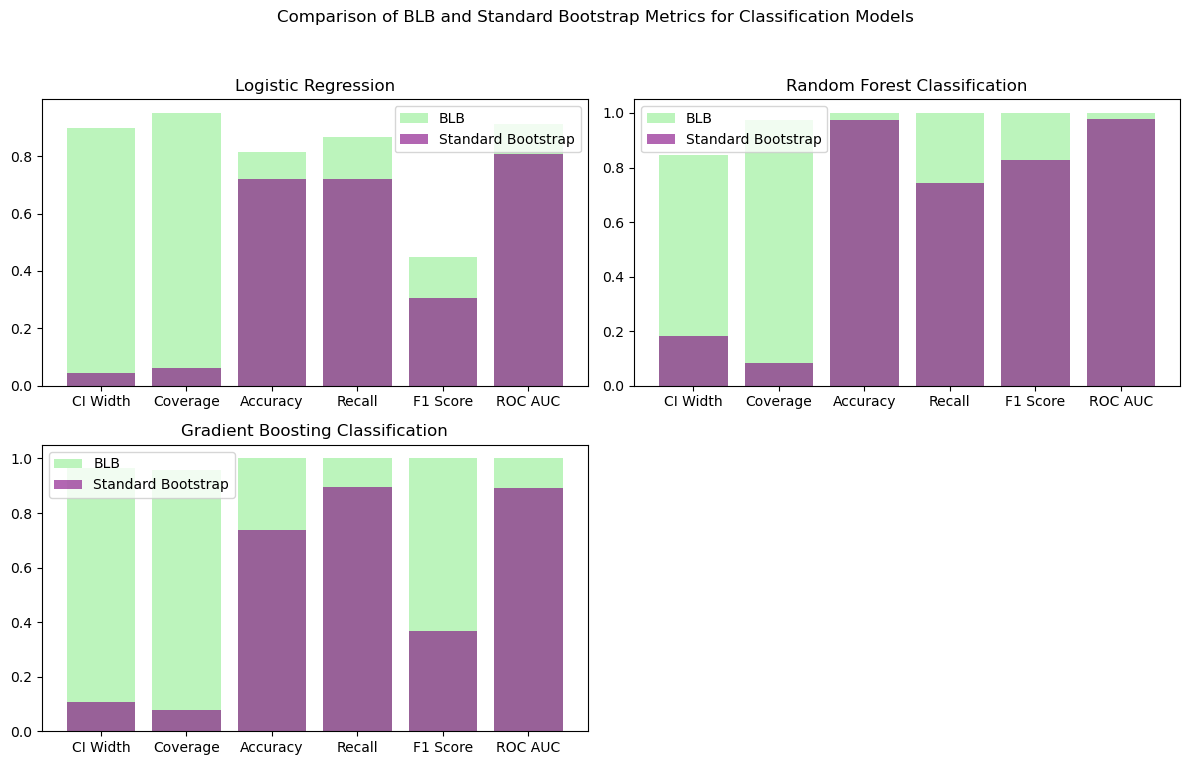

In [36]:
plt.figure(figsize=(12, 8))
for i, (name, metrics) in enumerate(clf_comparison_results.items()):
    plt.subplot(2, 2, i + 1)
    plt.bar(metrics['BLB'].keys(), metrics['BLB'].values(), color='lightgreen', alpha=0.6, label='BLB')
    plt.bar(metrics['Standard Bootstrap'].keys(), metrics['Standard Bootstrap'].values(), color='purple', alpha=0.6, label='Standard Bootstrap')
    plt.title(name)
    plt.legend()
plt.suptitle('Comparison of BLB and Standard Bootstrap Metrics for Classification Models')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()